# Numerical Simulation Laboratory

# Numerical exercise 8

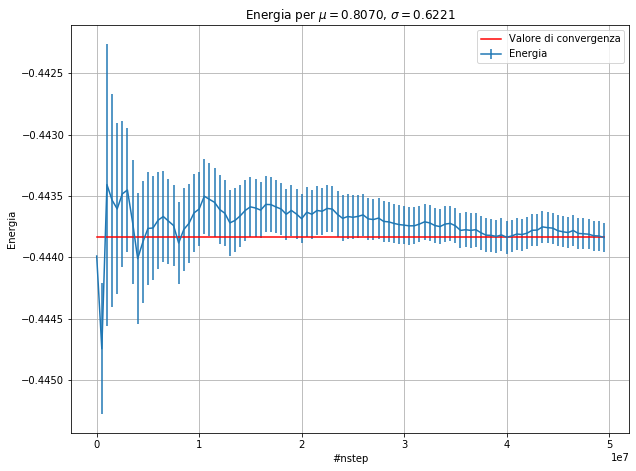

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt

nblock = 100
nstep = 5e5
ntot = nblock*nstep

fig=plt.figure(figsize=(10,7.5))
nstep = np.arange(0, ntot, step=nstep)
Ene, errEne = np.loadtxt('Files/Ene.out', unpack=True)
enefin = Ene[len(Ene)-1]
y = enefin*nstep**0

plt.title("Energia per $\mu=0.8070$, $\sigma=0.6221$")
plt.errorbar(nstep, Ene, yerr=errEne, label='Energia')
plt.plot(nstep, y, color='red', label='Valore di convergenza')
plt.xlabel("#nstep")
plt.ylabel("Energia")
plt.legend()
plt.grid(True)
plt.show()

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


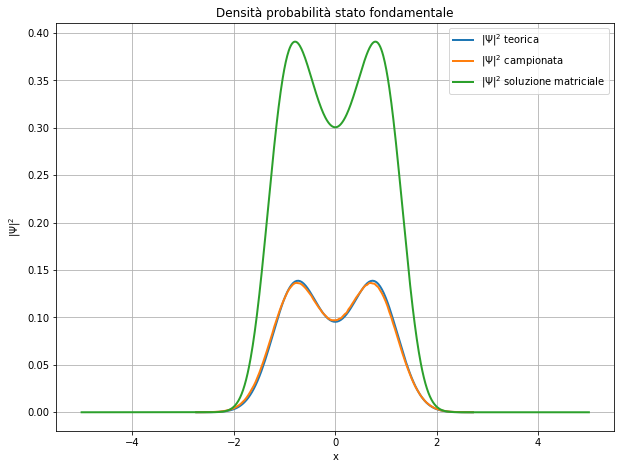

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
pi = math.pi

def Vpot(x):
    return (x**2 - 2.5)*x**2

a = 10
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-CDiff)/(2*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#Autovalori energia
print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

fig=plt.figure(figsize=(10,7.5))
mu = 0.8070
sigma = 0.6221

X, Psi2 = np.loadtxt('Files/Psi.out', unpack=True)
Psiteo = np.exp( -(X-mu)**2/(2*sigma*sigma) ) + np.exp( -(X+mu)**2/(2*sigma*sigma) )
pdf = Psiteo**2

norm = np.linalg.norm(pdf)
pdf /= norm

plt.plot(X, pdf, label='$|\Psi|^2$ teorica', lw=2)
plt.plot(X, Psi2, label='$|\Psi|^2$ campionata', lw=2)
plt.plot(x,(psi[0])**2, label="$|\Psi|^2$ soluzione matriciale", lw=2)
plt.title('Densità probabilità stato fondamentale')
plt.xlabel("x")
plt.ylabel("$|\Psi|^2$")
plt.grid(True)
plt.legend()
plt.show()